# About Author:
- Name: Moshin Shareef.
- [Email](mohsinshareef822@gmail.com)
- [Github](https://github.com/MohsinShareef)
- [Kaggle](https://www.kaggle.com/mohsin31202)
- Project: Animated Movies and TV Shows.
- Submission Date: March 2024.

## About Dataset
### Context
- All Animated TV shows with IMDb and Google user rating

- Presenting a comprehensive compilation of Animated television series, featuring essential details such as series name, episode/season count, release year, streaming platform, production company, co-producers, IMDb rating, and Google user rating.

### Content
- ID: ID for each Animated TV shows
- Title: Name of each Animated TV shows
- Episodes: Number of Episodes
- Year: The release year of the animated movie
- Original channel: The streaming platform where the animated series originally aired
- American company: The Animation's production company
- Note: The Animation's co-production company
- Technique: The artistic methodology utilized in the creation of the animation
- IMDb: The IMDb rating
- Google users: The Percentage of Google users liked this TV Show
### Collected by:
- Name: Kumar Arnav
- [Kaggle id Kumar Arnav](https://www.kaggle.com/arnavvvvv)

## Important libraries 
- Pandas: For Data Analysis.
- Numpy: For Math Functions.
- Matplotlib: Data Visualization.
- Seaborn: Data Visualization in Attractive Way.
- Plotly Data Visualization in Interactive and Attractive Way.
## Python Version:
- Python 3.11.5  

In [60]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# display all columns
pd.set_option('display.max_columns', None)
# display all rows
pd.set_option('display.max_rows', None)

# Load online dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset
- Create new dataframe.
- Create df for accumulation of data.

In [2]:
# load dataset from kaggle 

# df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')

# Load dataset 
df = pd.read_csv('./data/Animated_Tv_Series.csv', encoding = "ISO-8859-1")

# Let's Start Data Wrangling
- Look first five rows

In [3]:
df.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


- Shape of the dataset.

In [4]:
df.shape

(1816, 10)

- Information of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1816 non-null   int64  
 1   Title             1816 non-null   object 
 2   Episodes          1798 non-null   float64
 3   Year              1816 non-null   object 
 4   Original channel  1809 non-null   object 
 5   American company  1771 non-null   object 
 6   Note              488 non-null    object 
 7   Technique         1816 non-null   object 
 8   IMDb              1812 non-null   float64
 9   Google users      1812 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 142.0+ KB


- Print the columns name.

In [6]:
df.columns

Index(['Id', 'Title', 'Episodes', 'Year', 'Original channel',
       'American company', 'Note', 'Technique', 'IMDb', 'Google users'],
      dtype='object')

## Obervation Set 1:-
- The data have 10 columns/attributes.
- The dataset have 1816 rows/entries. 
- 3 columns/attributes are numerical data type according to python.
- 7 rows/entries are object data type according to python.
- The columns name are following:
  - ['Id', 'Title', 'Episodes', 'Year', 'Original channel',
  - 'American company', 'Note', 'Technique', 'IMDb', 'Google users'].


- Statistical summay of dataset

In [7]:
# summary of dataset
df.describe()

,Id,Episodes,IMDb
count,1816.000000,1798.000000,1812.000000
mean,908.500000,45.366518,6.712031
std,524.378362,120.085662,1.228804
min,1.000000,1.000000,1.500000
25%,454.750000,13.000000,6.200000
50%,908.500000,26.000000,6.900000
75%,1362.250000,52.000000,7.500000
max,1816.000000,4633.000000,9.300000


## Obervation Set 2:-
- In `Episodes` column maximum value is 4633 and minimum 1.
- It's vary big number 4633 maybe this is outlier.
- `IMDb` maximum rating is 9.3 and minimum is 1.5.
- `Google users` column are object data type i convert into integer.
- `Year` column are object data type it's also convertable into date data type.

### Check the missing values of this dataset

In [8]:
df.isnull().sum().sort_values(ascending = False)

Note                1328
American company      45
Episodes              18
Original channel       7
IMDb                   4
Google users           4
Id                     0
Title                  0
Year                   0
Technique              0
dtype: int64

- Check the percentage of missing values

In [9]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending = False)

Note                73.127753
American company     2.477974
Episodes             0.991189
Original channel     0.385463
IMDb                 0.220264
Google users         0.220264
Id                   0.000000
Title                0.000000
Year                 0.000000
Technique            0.000000
dtype: float64

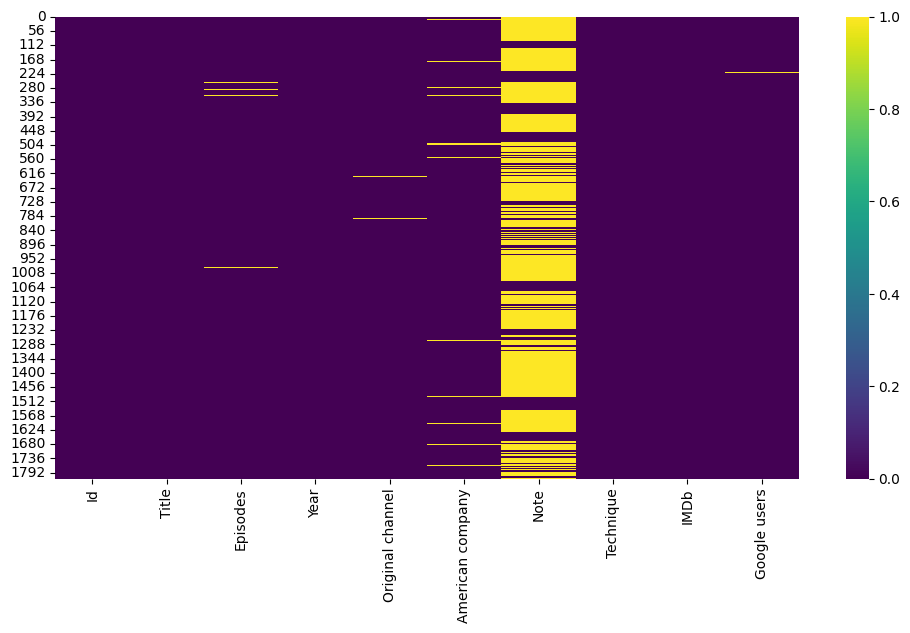

In [10]:
# missing values 
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()

<center><b>Figure 1.</b>- Show the missing values</center>

In [11]:
df[df['American company'].isnull()].head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
11,12,ABC Galaxy,26.0,2015,BabyFirst,NaN,NaN,Flash,4.2,57%
12,13,The ABC Saturday Superstar Movie,20.0,1972-1973,ABC,NaN,NaN,Traditional,7.8,60%
27,28,The Adventures of Edward the Less,13.0,2001,Sci-Fi Channel,NaN,NaN,Flash,6.4,64%
32,33,Adventures in Nutrition with Captain Carlos,20.0,2004-2005,Playhouse Disney,NaN,NaN,Flash,5.2,55%
119,120,Around the World in Eighty Days,16.0,1972-1973,NBC,NaN,Australian co-production,Traditional,6.9,74%


In [12]:
df['American company'].nunique()

505

In [13]:
# the missing values in the 'American company' column with backfill
df['American company'] = df['American company'].fillna(method = 'bfill')

In [14]:
df[df['Episodes'].isnull()].head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
132,133,Barker Bill's Cartoon Show,NaN,1953-1955,CBS,Terrytoons,NaN,Traditional,4.2,75%
258,259,Calliope,NaN,1978-1993,USA Network,Buzzco Associates,NaN,Traditional/Live-Action,8.0,89%
283,284,The Cat&Birdy Warneroonie PinkyBrainy Big Cart...,NaN,1999-2000,Kids' WB,Warner Bros. Animation,NaN,Traditional,6.7,54%
286,287,The Catillac Cats,NaN,1984-1985,Syndication,DIC Entertainment,NaN,Traditional,6.6,95%
309,310,Cita's World,NaN,1999-2003,BET,Cartoon Network Studios,NaN,CGI,6.5,94%


In [15]:
# the missing values in the 'Episodes' column with median
df['Episodes'] = df['Episodes'].fillna(df['Episodes'].median())

In [16]:
df['Original channel'].nunique()

226

In [17]:
# the missing values in the 'Original channel' column with mode
df['Original channel'] = df['Original channel'].fillna(df['Original channel'].mode()[0])


In [18]:
df[df['IMDb'].isnull()].head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
112,113,The Ambiguously Gay Duo,12.0,1996-2011,NBC,"J.J. Sedelmaier Productions, Inc.",Shown on TV Funhouse,Traditional,NaN,84%
226,227,Bedtime Primetime Classics,12.0,1996,Direct-to-Video,Phoenix Animation Studios\r\nBlye Migicovsky P...,Canadian co-production,Traditional,NaN,NaN
299,300,Cherub Wings,15.0,2000-2005,Direct-to-Video,Sunny Side-Up Entertainment,NaN,CGI,NaN,63%
552,553,The Fox Cubhouse,234.0,1994-1996,Fox Kids,WQED,NaN,Traditional/Live-action,NaN,NaN


In [19]:
# the missing values in the 'IMDb' column with median
df['IMDb'] = df['IMDb'].fillna(df['IMDb'].median())

In [20]:
df[df['Google users'].isnull()].head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
214,215,Baby Shark's Big Show!,52.0,2020-present,Nickelodeon,Nickelodeon Animation Studio,South Korean co-production,Flash,3.1,NaN
219,220,Barbie Dreamhouse Adventures,52.0,2018-2020,Netflix,Mattel Television,Canadian co-production,CGI,6.7,NaN
226,227,Bedtime Primetime Classics,12.0,1996,Direct-to-Video,Phoenix Animation Studios\r\nBlye Migicovsky P...,Canadian co-production,Traditional,6.9,NaN
552,553,The Fox Cubhouse,234.0,1994-1996,Fox Kids,WQED,NaN,Traditional/Live-action,6.9,NaN


In [21]:
# the missing values in the 'Google users' column with mode
df['Google users'] = df['Google users'].fillna(df['Google users'].mode()[0])

In [22]:
# the missing values in the 'Note' column with Not Available
df['Note'] = df['Note'].fillna('Not Available')

In [23]:
df.isnull().sum()

Id                  0
Title               0
Episodes            0
Year                0
Original channel    0
American company    0
Note                0
Technique           0
IMDb                0
Google users        0
dtype: int64

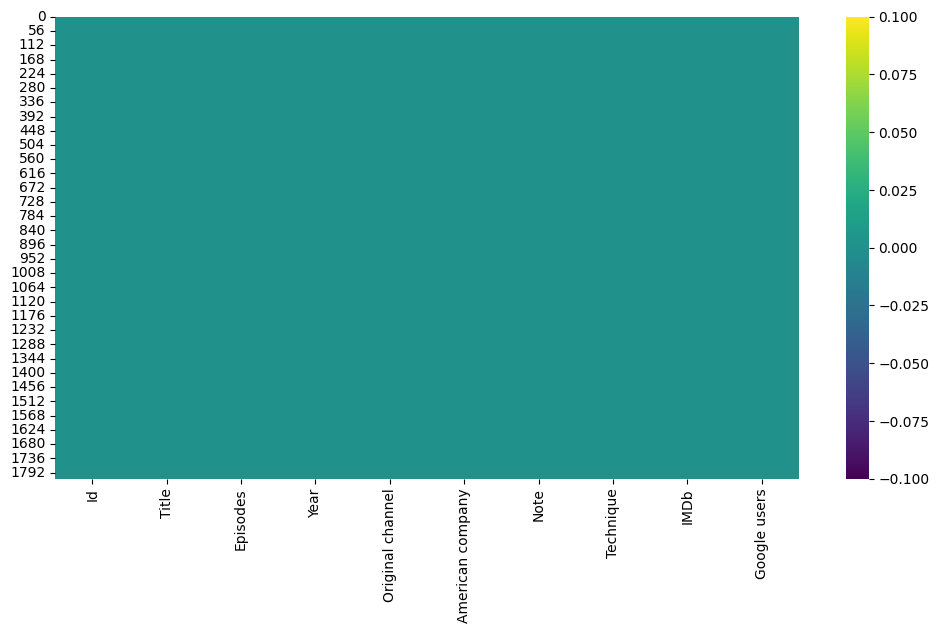

In [24]:

plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()

<center><b>Figure 2.</b>- Show the missing values</center>

## Complete 1 Milestone:-
### Check the duplicates values in the dataset.

In [25]:
df.duplicated().sum()

0

In [26]:
df['Title'].duplicated().sum()

2

In [27]:
# Show the title duplicate rows
df[df['Title'].duplicated(keep = False)]

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
266,267,Capt'n Sailorbird,190.0,1959-1960,Syndication,Magic Screen Pictures Inc.,Not Available,Traditional,5.4,68%
271,272,Capt'n Sailorbird,190.0,1959,Syndication,Magic Screen Pictures Inc.,Not Available,Traditional,4.2,64%
1385,1386,Space Sentinels,13.0,1977,NBC,Filmation,Not Available,Traditional,6.9,94%
1386,1387,Space Sentinels,13.0,1977,NBC,Filmation,Not Available,Traditional,6.9,94%


In [28]:
# before dropping shape of data
df.shape

(1816, 10)

In [29]:
# drop title duplicates
df.drop_duplicates(subset = 'Title', keep = 'first', inplace = True)

In [30]:
# after dropping shape of data
df.shape

(1814, 10)

## Complete 2 Milestone:-

# Let's Start Exploratory Data Analysis.
- Find the hidden insighs of data.
- Explore column by column.

In [31]:
df.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,Not Available,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,Not Available,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,Not Available,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,Not Available,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


- Explore the `Episodes` column.
- Check the highest value.

In [36]:

print(df['Episodes'].nunique())
print(df["Episodes"].max())
print(df["Episodes"].unique())

177
4633.0
[2.600e+01 2.700e+01 1.300e+01 2.800e+01 5.100e+01 4.400e+01 3.100e+01
 6.500e+01 5.200e+01 2.000e+01 3.900e+01 1.200e+01 4.100e+01 1.600e+01
 2.100e+01 6.000e+00 2.830e+02 4.000e+00 2.000e+00 1.700e+01 5.000e+00
 6.100e+01 4.500e+01 7.800e+01 1.630e+02 1.500e+02 3.400e+01 1.000e+01
 7.000e+00 8.600e+01 4.000e+01 5.500e+01 3.360e+02 1.500e+01 1.020e+02
 3.520e+02 9.000e+00 5.800e+01 6.200e+01 3.000e+01 9.900e+01 3.600e+01
 7.600e+01 1.390e+02 3.000e+00 1.800e+01 1.450e+02 5.000e+01 2.200e+01
 1.900e+01 6.300e+01 1.270e+02 6.000e+01 1.300e+02 2.400e+02 2.530e+02
 7.200e+01 5.300e+01 3.200e+01 1.000e+02 8.500e+01 2.700e+02 1.780e+02
 4.600e+01 8.000e+01 5.600e+01 1.100e+02 8.000e+00 1.430e+02 2.600e+02
 7.700e+01 4.900e+01 1.570e+02 2.300e+01 6.840e+02 1.040e+02 7.500e+01
 9.400e+01 1.250e+02 4.200e+01 6.900e+01 8.100e+01 8.200e+01 4.700e+01
 1.900e+02 1.130e+02 1.460e+02 7.000e+01 6.800e+01 2.900e+01 2.400e+01
 8.900e+01 4.800e+01 1.400e+01 1.700e+02 1.980e+02 1.100e+01 9.300

In [33]:
df[df['Episodes'] == 4633].head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
1445,1446,Sesame Street,4633.0,1969-present,PBSPBS KidsHBO,Sesame Workshop,Not Available,CGI/Flash/Stop-Motion/Traditional/Live-action,8.1,78%


- The `Title` `Sesame Street` have 4633 `Episodes` this is a outlier we ferther deal when we need

In [35]:
print(df['Year'].nunique())
print(df["Year"].unique())

422
['1993-1995' '2000-2008' '2002-2003' '2018-2019' '2008-2010' '2014-2016'
 '2005-2020' '1985' '1997-1998' '1994-1997' '2009-2012' '2015' '1972-1973'
 '1967-1968' '2022-2023' '2001-2002' '1995-1996' '2021-present' '1973'
 '1992-1993' '2013-2015' '2010-2018' '2020-2021' '2023-present'
 '1996-2000' '1968-1969' '2006' '2001' '2002-2006' '2018' '2004-2005'
 '2015-2016' '1950' '1956-1957' '2015-2018' '1988' '1959-1964' '1992-1996'
 '1958-1961' '1966-1968' '1985-1991' '1991-1995' '2023' '2022' '1994-1995'
 '1988-1989' '1987-1989' '2022-present' '2019' '1996-1998' '2003-2008'
 '2014-2017' '1978-1983' '1993' '1977-1978' '2011' '1983-1990' '1961-1962'
 '1972' '2005-present' '2005-2007' '2019-2022' '1997-2001' '2016-2018'
 '1993-1998' '2020-2023' '2017' '2018-2021' '2000-present' '1967-1970'
 '2021' '2009-2023' '2019-2021' '1971-1973' '2016-2019' '2006-2008'
 '2014-2015' '1965-1967' '1990-1991' '1965-1968' '1959-1962' '2005-2006'
 '2005-2008' '2013-2019' '2010-2011' '1995-2000' '2000-2001' '20

In [40]:
print(df['Original channel'].nunique())
print(df['Original channel'].unique())

226
['TBS' 'Direct to video' 'MTV' 'Netflix' 'Playhouse Disney' 'Disney XD'
 'Adult Swim' 'ABC' 'ABCSyndication' 'Nickelodeon' 'PBS Kids' 'BabyFirst'
 'Syndication' 'HuluPeacock' 'NBC' 'Fox' 'Cartoon Network' 'HBO Max' 'Max'
 'PBSPBS Kids' 'CBS' 'MTV2' 'Sci-Fi Channel' 'FXX' 'Amazon Prime Video'
 'ABCNBC' 'YouTube' 'Disney Junior' 'IGN' 'Syfy' 'Fox Family Channel'
 'ANC' 'Fox (2005-2014)TBS (2014-present)' 'Disney Channel' 'Showtime'
 'HBO' "Fox Kids (1993-1995)Kids' WB (1995-1998)" 'Hulu'
 'FX (2009-2016)FXX (2017-2023)' 'NetflixPeacock' 'Sprout'
 "Fox Children's Network" 'FoxFXX' 'CBSNickelodeon' 'Fox Kids' 'The Hub'
 'CBC Kids' 'PBS Kids Go!' 'Pax' 'Fox Kids Network' 'Peacock' 'The WB'
 "Kids' WB (season 1)Cartoon Network (season 2)" "Kids' WB" 'Cartoonito'
 'Disney+' 'MTVParamount+' 'Direct-to-Video' 'Paramount+' '4Kids TV' 'BET'
 'BabyFirstTV' 'The Disney Channel' 'Nick Jr.' 'Fox (4Kids TV)'
 'Comedy Central' 'ABC\r\nCBS' 'TBN' 'Cartoon NetworkBoomerang' 'UPNABC'
 'Fox Family' 'Di

In [43]:
print(df['American company'].nunique())
print(df['American company'].unique())

505
['Hanna-Barbera' 'Big Idea Productions'
 'Warner Bros. AnimationMTV Animation' 'DreamWorks Animation Television'
 'Little Airplane Productions' 'Disney Television Animation'
 'Williams Street' 'Jumbo PicturesDisney Television Animation'
 'Klasky CsupoGames Animation' 'Sesame Workshop'
 'Nickelodeon Animation Studio' 'DIC Entertainment' 'Netflix Animation'
 'ADHD Studios' 'Frederator StudiosCartoon Network Studios'
 'PorchLight Entertainment' 'Filmation' 'MTV Animation'
 'Hyperion Animation'
 'O EntertainmentDNA ProductionsNickelodeon Animation Studio'
 "Schneider's BakeryNickelodeon Animation Studio" 'Tempe-Toons'
 'CBS Entertainment Productions' 'Jay Ward Productions'
 'Beverly Hills Productions' 'Walt Disney Television Animation'
 'Sony Pictures Animation' 'Stoopid Buddy Stoodios'
 'Reverse Engineering Studios' 'Broadway Video' 'MGM Animation'
 'Klasky CsupoNickelodeon Animation Studio' 'DIC Animation City'
 'Chernin Entertainment' 'Bagdasarian Productions'
 'Fuzzy Door Productio

In [44]:
print(df['Note'].nunique())
print(df['Note'].unique())

101
['Not Available' 'British co-production' 'Canadian co-production'
 'British-Canadian co-production' 'Australian co-production'
 'Italian co-production' 'Canadian-Italian co-production'
 'French-Japanese co-production' 'French co-production'
 'Shown on Maya & Miguel' 'Shown on TV Funhouse'
 'British-Canadian-Finnish co-production'
 'The last 2 episodes aired on Nicktoons leaving 6 unaired.'
 'South Korean co-production'
 'The last 6 episodes aired on Nicktoons in 2011.'
 'Japanese co-production' 'Canadian-Taiwanese co-production'
 'Chinese co-production'
 'The last 10 episodes aired on Nicktoons in 2016.' 'German co-production'
 'The last 10 episodes aired on Nicktoons.'
 'British-Chinese co-production' 'Irish co-production'
 'French-Indian co-production' 'British-Irish co-production'
 'Canadian co-production (season 1 only)' 'Canadian-French co-production'
 'French-German co-production'
 'British-German co-production. Season 1 only.'
 "First children's animated television series."


In [45]:
print(df['Technique'].nunique())
print(df['Technique'].unique())

41
['Traditional' 'CGI' 'Flash' 'Stop-Motion' 'Traditional/Live-Action'
 'CGI/Flash/Stop-Motion/Live-Action' 'Flash/Live-Action'
 'CGI/Flash/Stop-motion/Traditional'
 'Traditional (Seasons 1-15, 20-25)\r\nCel (Seasons 1-3)\r\nDigital ink-and-paint (Seasons 4-15, 20-25)\r\nFlash (Seasons 16-25)\r\nAdobe Flash (Seasons 16-19)\r\nToon Boom Harmony (Seasons 20-25)'
 'Traditional/Live-Action/Flash/CGI' 'CGI/Live-Action'
 'Traditional (season 1)/Flash (season 2-3)' 'Flash/Traditional/CGI'
 'Traditional/Stop-Motion/CGI/Flash'
 'Traditional (season 1)/Flash (season 2)'
 'Traditional/Digital ink-and-paint (seasons 1-5)/Flash/Adobe Flash (season 6-present)'
 'Flash/Traditional' 'Traditional (seasons 1-9)/Flash (season 10)'
 'Stop-motion' 'Flash/Live-action' 'Traditional/Live-action'
 'Live-Action/Traditional' 'Live-Action/Flash' 'CGI/Flash/Live-action'
 'CGI/Live-action'
 'Traditional/Digital ink-and-paint (season 1)/Flash/Adobe Flash (seasons 2-6)'
 'Traditional/CGI' 'Traditional/Flash' 'Tradit

In [46]:
print(df['IMDb'].nunique())
print(df['IMDb'].unique())

76
[7.2 6.5 8.  7.6 7.8 5.7 7.3 6.1 4.9 4.2 7.  6.4 5.8 6.6 8.6 8.7 8.9 5.9
 6.7 2.6 5.2 7.5 1.6 4.7 4.3 6.3 6.2 6.  5.4 6.8 8.4 5.5 7.1 7.4 8.3 7.9
 7.7 8.1 6.9 8.5 4.6 9.3 4.5 9.  5.3 8.2 5.6 2.8 8.8 3.7 1.9 3.1 5.  2.
 4.  3.  3.4 2.1 4.1 5.1 3.8 4.4 2.5 1.5 3.3 3.9 3.2 3.6 4.8 2.2 9.1 2.3
 3.5 2.9 1.7 2.7]


In [47]:
print(df['Google users'].nunique())
print(df['Google users'].unique())

78
['91%' '87%' '77%' '92%' '85%' '72%' '83%' '86%' '76%' '57%' '60%' '78%'
 '66%' '81%' '54%' '93%' '95%' '82%' '88%' '94%' '73%' '64%' '89%' '80%'
 '55%' '25%' '74%' '79%' '69%' '62%' '90%' '84%' '61%' '39%' '65%' '59%'
 '70%' '68%' '96%' '53%' '71%' '41%' '44%' '75%' '52%' '46%' '56%' '58%'
 '98%' '67%' '10%' '48%' '42%' '49%' '63%' '50%' '34%' '45%' '36%' '97%'
 '26%' '9%' '47%' '12%' '51%' '31%' '33%' '37%' '32%' '35%' '24%' '21%'
 '14%' '38%' '16%' '43%' '11%' '100%']


- Remove the percentage sign.
- Change the datatype of `Google users`. 

In [48]:
df['Google users'] = df['Google users'].str.replace('%', '').astype('float')

In [50]:
df['Google users'].dtypes

dtype('float64')

# Let's start find the patterns and insight.

### Q1. Find out the Top `Original Channels` Name?
### Q2. Top 5 popular `American production` companies?
### Q3. Check the Co-Producers(Note) top companies?
### Q4. Find out the top `Technique` used in animated series?
### Q5. Highest IMDs rating TV Series?
### Q6. TV Series with highest google users likes?
### Q7. Original Channel with highest google Rating?
### Q8. Original Channel with highest IMDb Rating?
### Q9. Lowest IMDb rating tv series?
### Q10. Lowest Google rating tv series?
### Q11. Which TV Series produce highest numbers of episodes?
### Q12. Which Original channel Produce highest numbers of episodes?
### Q13. Which Company Produce highest numbers of episodes?
### Q14. How many Tv Series are continue in present year according to given dataset?
### Q15. Check the Correlation between `IMDb` and `Google users`?

In [51]:
df.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,Not Available,Traditional,7.2,91.0
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,Not Available,CGI,6.5,91.0
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,Not Available,Traditional,8.0,87.0
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,Not Available,CGI,7.6,77.0
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92.0


### Q1. Find out the Top `Original Channels` Name?

In [56]:

top_5_original_channels = df['Original channel'].value_counts().sort_values(ascending = False).head()
top_5_original_channels.reset_index().rename(columns = {'index': 'Original channel', 'Original channel': 'Channel Name'})

,Channel Name,count
0,Syndication,205
1,Netflix,143
2,ABC,132
3,CBS,123
4,Cartoon Network,116


In [63]:
fig = px.bar(x= top_5_original_channels.index, y = top_5_original_channels.values)
fig.update_layout(title = 'Top 5 Original Channels', xaxis_title = 'Channels', yaxis_title = 'Count')
fig.show()

<center><b>Figure 3.</b>- Top 5 Channels</center>

### Q2. Top 5 popular `American production` companies?

In [59]:

top_5_american_companies = df['American company'].value_counts().sort_values(ascending = False).head()
top_5_american_companies.reset_index().rename(columns = {'index': 'American company', 'American company': 'Company Name'})

,Company Name,count
0,Hanna-Barbera,193
1,DIC Entertainment,72
2,Warner Bros. Animation,63
3,Nickelodeon Animation Studio,61
4,Cartoon Network Studios,57


In [62]:

fig = px.bar(x = top_5_american_companies.index, y = top_5_american_companies.values)
fig.update_layout(title = 'Top 5 American Companies', xaxis_title = 'Companies', yaxis_title = 'Count')
fig.show()

<center><b>Figure 4.</b>- Top 5 American Companies</center>

### Q3. Check the Co-Producers(Note) top companies?

In [80]:

top_5_notes = df['Note'].value_counts().sort_values(ascending = False).head(6)
top_5_notes_reset = top_5_notes.drop('Not Available')
top_5_notes_reset.reset_index().rename(columns = {'index': 'Note', 'Note': 'Company Name'})

,Company Name,count
0,Canadian co-production,216
1,French co-production,39
2,British co-production,38
3,Japanese co-production,34
4,Australian co-production,18


In [81]:

fig = px.bar(x = top_5_notes_reset.index, y = top_5_notes_reset.values)
fig.update_layout(title = 'Top 5 Notes', xaxis_title = 'Notes', yaxis_title = 'Count')
fig.show()

<center><b>Figure 5.</b>- Top 5 Co-Producers</center>

### Q4. Find out the top `Technique` used in animated series?

In [83]:

top_5_techniques = df['Technique'].value_counts().sort_values(ascending = False).head()
top_5_techniques.reset_index().rename(columns = {'index': 'Technique', 'Technique': 'Technique Name'})

,Technique Name,count
0,Traditional,1053
1,Flash,356
2,CGI,277
3,Stop-Motion,31
4,Traditional/Live-Action,15


In [84]:

fig = px.bar(x = top_5_techniques.index, y = top_5_techniques.values)
fig.update_layout(title = 'Top 5 Techniques', xaxis_title = 'Techniques', yaxis_title = 'Count')
fig.show()

<center><b>Figure 6.</b>- Top 5 Technique</center>

### Q5. Highest IMDs rating TV Series? 

In [98]:

title_with_highest_IMDb = df.groupby('Title')['IMDb'].max().sort_values(ascending = False).head()
title_with_highest_IMDb.reset_index().rename(columns = {'Index': 'title', 'IMDb': 'Rating'})

,Title,Rating
0,Avatar: The Last Airbender,9.3
1,"Jelly, Ben, & Pogo",9.3
2,Rick and Morty,9.1
3,Office Ladies: The Animated Series,9.1
4,Arcane,9.0


In [107]:

fig = px.bar(x = title_with_highest_IMDb.index, y = title_with_highest_IMDb.values)
fig.update_layout(title = 'Title with Highest IMDb Rating', xaxis_title = 'TV Series', yaxis_title = 'Rating')
fig.show()

<center><b>Figure 7.</b>- High Rating TV Shows</center>

### Q6. TV Series with highest google users likes?

In [101]:
title_with_highest_google_users = df.groupby('Title')['Google users'].max().sort_values(ascending = False).head()
title_with_highest_google_users.reset_index().rename(columns = {'Index': 'title', 'Google users': 'Likes'})

,Title,Likes
0,The Wonderful Stories of Professor Kitzel,100.0
1,Bee and PuppyCat: Lazy in Space,98.0
2,Epithet Erased,98.0
3,Mina and the Count,98.0
4,Braingames,98.0


In [106]:
fig = px.bar(x = title_with_highest_google_users.index, y= title_with_highest_google_users.values)
fig.update_layout(title= 'TV Shows with Highest Google Likes', xaxis_title='TV Series', yaxis_title='Likes')
fig.show()

<center><b>Figure 8.</b>- Highest Google Likes TV Shows</center>

### Q7. Original Channel with highest google Rating?

In [110]:
Channels_with_highest_google_users =df.groupby('Original channel')['Google users'].max().sort_values(ascending = False).head()
Channels_with_highest_google_users.reset_index().rename(columns = {'Index': 'Original channel', 'Google users': 'Google users'})

,Original channel,Google users
0,Syndication,100.0
1,Netflix,98.0
2,HBO,98.0
3,MTV,98.0
4,VRV,98.0


### Q8. Original Channel with highest IMDb Rating?

In [111]:
Channels_with_highest_IMDb = df.groupby('Original channel')['IMDb'].max().sort_values(ascending = False).head()
Channels_with_highest_IMDb.reset_index().rename(columns = {'Index': 'Original channel', 'IMDb': 'IMDb'})

,Original channel,IMDb
0,PBS Kids,9.3
1,Nickelodeon,9.3
2,Comedy Central,9.1
3,Adult Swim,9.1
4,Netflix,9.0


### Q9. Lowest IMDb rating tv series?

In [114]:

title_with_lowest_IMDb=df.groupby('Title')['IMDb'].min().sort_values(ascending = True).head()
title_with_lowest_IMDb.reset_index().rename(columns = {'Index': 'title', 'IMDb': 'IMDb'})

,Title,IMDb
0,High Guardian Spice,1.5
1,Fairview,1.5
2,The Adventures of Paddy the Pelican,1.6
3,Velma,1.6
4,Santa Inc.,1.7


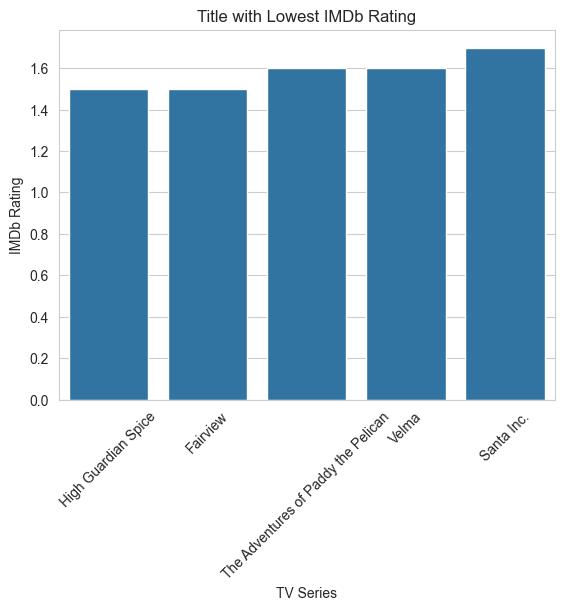

In [126]:

sns.barplot(x = title_with_lowest_IMDb.index, y = title_with_lowest_IMDb.values)
plt.title('Title with Lowest IMDb Rating')
plt.xlabel('TV Series')
plt.ylabel('IMDb Rating')
plt.xticks(rotation = 45)
plt.show()

<center><b>Figure 9.</b>- Lowest IMDb Rating TV Shows</center>

### Q10. Lowest Google rating tv series?

In [115]:
title_with_lowest_google_users = df.groupby('Title')['Google users'].min().sort_values(ascending = True).head()
title_with_lowest_google_users.reset_index().rename(columns = {'Index': 'title', 'Google users': 'Google users'})

,Title,Google users
0,Fairview,9.0
1,Santa Inc.,9.0
2,Breezly and Sneezly,10.0
3,Slacker Cats,10.0
4,Velma,11.0


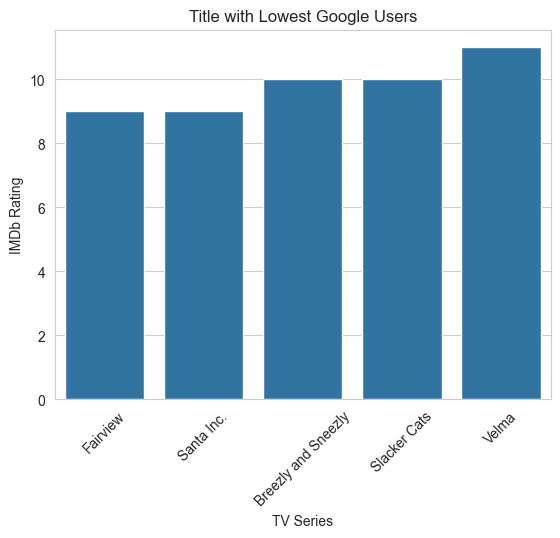

In [127]:
sns.barplot(x = title_with_lowest_google_users.index, y = title_with_lowest_google_users.values)
plt.title('Title with Lowest Google Users')
plt.xlabel('TV Series')
plt.ylabel('IMDb Rating')
plt.xticks(rotation = 45)
plt.show()

<center><b>Figure 10.</b>- Lowest Google Likes TV Shows</center>

### Q11. Which TV Series produce highest numbers of episodes?

In [130]:
title_with_highest_episodes =df.groupby('Title')['Episodes'].max().sort_values(ascending = False).head()
title_with_highest_episodes.reset_index().rename(columns = {'Index': 'title', 'Episodes': 'Episodes'})

,Title,Episodes
0,Sesame Street,4633.0
1,The Simpsons,753.0
2,The Bugs Bunny Show,684.0
3,Toon In with Me,600.0
4,Crusader Rabbit,455.0


In [131]:
fig = px.bar(x = title_with_highest_episodes.index, y = title_with_highest_episodes.values)
fig.update_layout(title = 'Title with Highest Episodes', xaxis_title = 'TV Series', yaxis_title = 'Episodes')
fig.show()

<center><b>Figure 11.</b>- TV Shows highest number of Episodes</center>

### Q12. Which Original channel Produce highest numbers of episodes?

In [133]:
Channels_with_high_no_of_episodes = df.groupby('Original channel')['Episodes'].max().sort_values(ascending = False).head()
Channels_with_high_no_of_episodes.reset_index().rename(columns = {'Index': 'Original channel', 'Episodes': 'Episodes'})

,Original channel,Episodes
0,PBSPBS KidsHBO,4633.0
1,Fox,753.0
2,ABC\r\nCBS,684.0
3,MeTV,600.0
4,Syndication,455.0


### Q13. Which Company Produce highest numbers of episodes?

In [135]:
companys_with_highest_no_of_episodes = df.groupby('American company')['Episodes'].max().sort_values(ascending = False).head()
companys_with_highest_no_of_episodes.reset_index().rename(columns = {'Index': 'American company', 'Episodes': 'Episodes'})

,American company,Episodes
0,Sesame Workshop,4633.0
1,Gracie Films20th century,753.0
2,Warner Bros. Cartoons,684.0
3,Spartina Productions,600.0
4,Television Arts Productions,455.0


### Q14. How many Tv Series are continue in present year according to given dataset?

In [146]:
print(f"{df['Year'].loc[df['Year'].str.contains('present')==True].value_counts().sum()} TV Shows are Continue")
df['Year'].loc[df['Year'].str.contains('present')==True].value_counts().reset_index().rename(columns = {'index': 'Year', 'Year': 'No. of TV Shows'})

166 TV Shows are Continue


,No. of TV Shows,count
0,2023-present,43
1,2022-present,33
2,2021-present,30
3,2020-present,7
4,2024-present,7
5,2019-present,7
6,2018-present,6
7,2011-present,5
8,2016-present,4
9,1999-present,3


### Q15. Check the Correlation between `IMDb` and `Google users`?

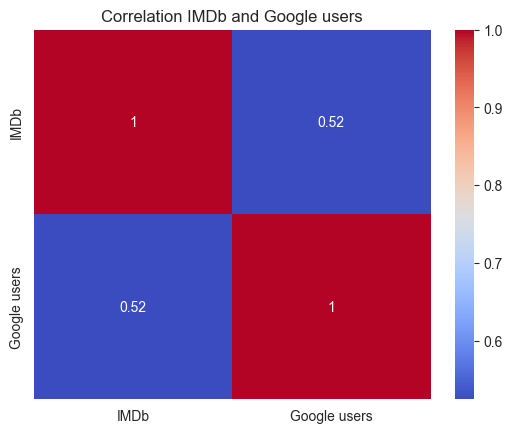

In [149]:
# Check the correlation IMDb and Google users
cor_relation = df[['IMDb', 'Google users']].corr()
sns.heatmap(cor_relation, annot = True, cmap='coolwarm')
plt.title('Correlation IMDb and Google users')
plt.show()

<center><b>Figure 12.</b>- Correlation IMDb vs Google users</center>

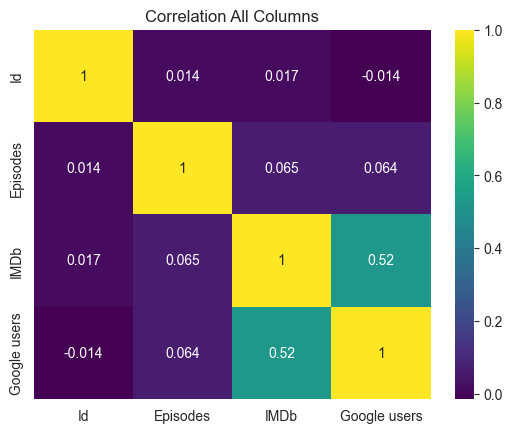

In [150]:
# check numarical columns with include function
cor_relation_num = df.select_dtypes(include = ['int64', 'float64'])
sns.heatmap(cor_relation_num.corr(), annot = True, cmap='viridis')
plt.title('Correlation All Columns')
plt.show()

<center><b>Figure 13.</b>- Correlation all Columns</center>

# Summary of data set
- Top Original Channels based on count `Syndication, Netflix, ABC, CBS, Cartoon Network`.
- Top American Companies `Hanna-Barbera, DIC Entertainment, Warner Bros. Animation, Nickelodeon Animation Studio, Cartoon Network Studios`.
- Top Notes are `Canadian`, `French`, `British`, `Japanese` and `Australian`.
- Most Popular Techniques for animated TV Shows `Traditional`, `Flash`.
- Highest IMDB Rating animated movies  `Avatar: The Last Airbender`, `Jelly, Ben, & Pogo`.
- Highest Google Likes TV Shows `The Wonderful Stories of Professor Kitzel`.
- Original Channels based on highest Google Users `Syndication`.
- Original channels based on highest IMDb `PBS Kids`, `Nickelodeon`.
- IMDb low rating series `High Guardian Spice`.
- Google low rating series `Faiview`, `Santa Inc`.
- `Sesame Street` tv series Produce highest number of episodes from  `PBSPBS KidsHBO` Channel Productions by `Sesame Workshop`.
- `166` TV Show/Series Continues in prasent year.
- `0.52%` Cor_relation between IMDb and Google users.